### WP Dumm aus Müster WP Profil (Essen_1)

Verwendete Dateien: 
- Muester_Tamb_Essen_1.csv, 
- T_amb_Essen_1.csv, 
- t_amb_profile_241112.csv

In [ ]:
# Dateien abrufen: Muester_Tamb_Essen_1.csv, T_amb_Essen_1.csv, t_amb_profile_241112.csv

import pandas as pd

# T_amb von ausgewählter Standort auswählen (neue Standort Profil mit meteostat_temperature.py generieren)
t_amb_standort = pd.read_csv('C:\\Users\\DianaEspinosaLozano\\anaconda3\\envs\\thesis\\T_amb_Essen_1.csv')

# Set DateTime
t_amb_standort['time'] = pd.to_datetime(t_amb_standort['time'])
t_amb_standort.set_index('time', inplace=True)

# Stündliche Werte in Mittelwerte pro Tag konvertieren
t_amb_standort = t_amb_standort.resample('24h').mean()
t_amb_standort


,temp
time,
2024-01-01,7.008333
2024-01-02,9.125000
2024-01-03,8.716667
2024-01-04,6.945833
2024-01-05,6.870833
...,...
2024-11-17,6.537500
2024-11-18,6.358333
2024-11-19,6.204167


In [3]:
# Müster Profil einlesen
t_amb_muester = pd.read_csv('C:\\Users\\DianaEspinosaLozano\\anaconda3\\envs\\thesis\\GETTINGSTARTED\\Muester_Tamb_Essen_1.csv')
t_amb_muester['time'] = pd.to_datetime(t_amb_muester['time'])
t_amb_muester.set_index('time', inplace=True)

# WP Verbrauchsprofil einlesen
wp_profil = pd.read_csv('C:\\Users\\DianaEspinosaLozano\\anaconda3\\envs\\thesis\\GETTINGSTARTED\\t_amb_profile_241112.csv')
wp_profil['time'] = pd.to_datetime(wp_profil['time'])
wp_profil.set_index('time', inplace=True)

In [12]:
import pandas as pd

# Beispiel: Ihre DataFrames sind wie folgt strukturiert:
# t_amb_muester['temp'] und t_amb_standort['temp'] enthalten tägliche Temperaturen mit Datumsindizes.
# wp_profil['WP (Wh)'] enthält stündliche Wärmepumpenverbrauchsdaten mit Datums- und Zeitindizes.

# Erstellen eines neuen DataFrames wp_neu mit dem gleichen Index wie wp_profil
wp_neu = pd.DataFrame(index=wp_profil.index, columns=['WP (Wh)'])

# Schleife durch jeden Eintrag (Datum und Temperatur) in t_amb_standort
for date_standort, temp_standort in t_amb_standort['temp'].items():
    # Berechnung des absoluten Temperaturunterschieds zwischen temp_standort und allen Werten in t_amb_muester
    temp_diffs = (t_amb_muester['temp'] - temp_standort).abs()
    
    # Finden des Tages in t_amb_muester mit der minimalen Temperaturdifferenz
    nearest_date = temp_diffs.idxmin()  # Datum in t_amb_muester mit geringstem Temperaturunterschied
    
    # Debugging-Ausgabe, um sicherzustellen, dass das Datum und die Temperatur gefunden wurden
    print(f"Für das Datum {date_standort} und die Temperatur {temp_standort} °C:")
    print(f"  -> Am nächsten liegendes Datum in t_amb_muester: {nearest_date} mit Temperatur {t_amb_muester.loc[nearest_date, 'temp']} °C")

    # Kopieren der stündlichen WP-Verbrauchsdaten für das Datum in wp_neu für den gesamten Tag
    mask_standort = wp_profil.index.normalize() == date_standort
    mask_nearest = wp_profil.index.normalize() == nearest_date
    
    # Überprüfen der Anzahl der Einträge, um sicherzustellen, dass die Längen übereinstimmen
    if len(wp_profil.loc[mask_nearest, 'WP (Wh)']) == len(wp_neu.loc[mask_standort, 'WP (Wh)']):
        wp_neu.loc[mask_standort, 'WP (Wh)'] = wp_profil.loc[mask_nearest, 'WP (Wh)'].values
        print(f"  -> WP-Verbrauchsdaten für {date_standort} erfolgreich kopiert.")
    else:
        print(f"  -> Unterschiedliche Längen: {len(wp_profil.loc[mask_nearest, 'WP (Wh)'])} vs {len(wp_neu.loc[mask_standort, 'WP (Wh)'])}")
    
# Anzeigen der Ergebnisse
print("\nErgebnis:")
print(wp_neu)

# Optional: Speichern des neuen DataFrames als CSV
wp_neu.to_csv('wp_neu.csv')


Für das Datum 2024-01-01 00:00:00 und die Temperatur 7.008333333333333 °C:
  -> Am nächsten liegendes Datum in t_amb_muester: 2024-04-18 00:00:00 mit Temperatur 7.154166666666666 °C
  -> WP-Verbrauchsdaten für 2024-01-01 00:00:00 erfolgreich kopiert.
Für das Datum 2024-01-02 00:00:00 und die Temperatur 9.125 °C:
  -> Am nächsten liegendes Datum in t_amb_muester: 2024-09-29 00:00:00 mit Temperatur 9.1875 °C
  -> WP-Verbrauchsdaten für 2024-01-02 00:00:00 erfolgreich kopiert.
Für das Datum 2024-01-03 00:00:00 und die Temperatur 8.716666666666667 °C:
  -> Am nächsten liegendes Datum in t_amb_muester: 2024-04-26 00:00:00 mit Temperatur 8.7125 °C
  -> WP-Verbrauchsdaten für 2024-01-03 00:00:00 erfolgreich kopiert.
Für das Datum 2024-01-04 00:00:00 und die Temperatur 6.945833333333333 °C:
  -> Am nächsten liegendes Datum in t_amb_muester: 2024-03-25 00:00:00 mit Temperatur 6.745833333333334 °C
  -> WP-Verbrauchsdaten für 2024-01-04 00:00:00 erfolgreich kopiert.
Für das Datum 2024-01-05 00:00

Neue WP Profil

<Axes: xlabel='time'>

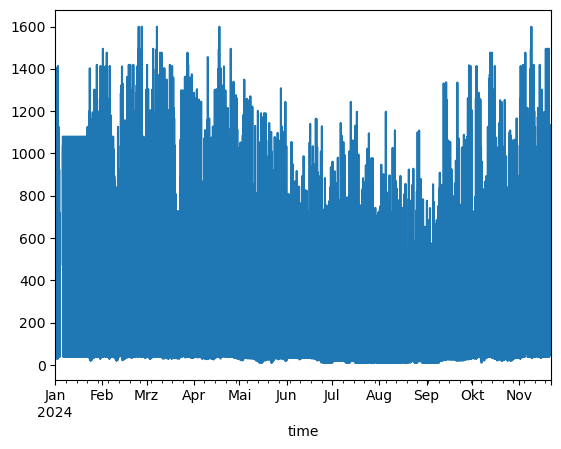

In [ ]:
wp_neu['WP (Wh)'].plot()

In [ ]:
# WP Verbrauch Summe pro Tag
wp_tag = wp_neu.resample('24h').sum()
wp_tag


,WP (Wh),WP_sum
time,,
2024-01-01,9204.32425,9204.32425
2024-01-02,9545.20675,9545.20675
2024-01-03,8925.737,8925.737
2024-01-04,1032.522,1032.522
2024-01-05,1032.522,1032.522
...,...,...
2024-11-17,10351.44775,10351.44775
2024-11-18,9460.30825,9460.30825
2024-11-19,9460.30825,9460.30825


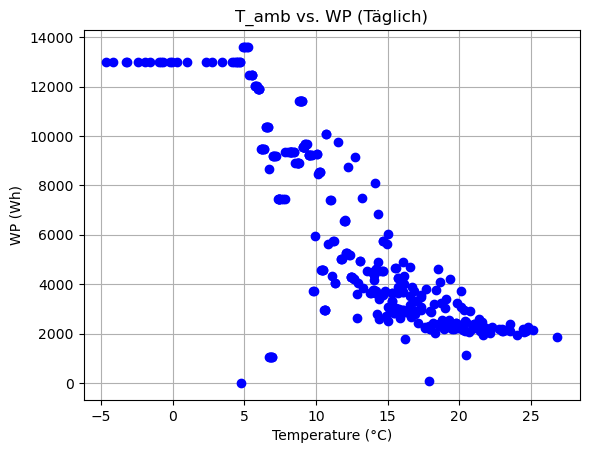

In [20]:
import matplotlib.pyplot as plt
plt.plot(t_amb_standort['temp'], wp_tag['WP (Wh)'], marker='o', linestyle='', color='b')


# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('WP (Wh)')
plt.title('T_amb vs. WP (Täglich)')
plt.grid(True)
plt.show()